Sources: <br>
* https://www.kaggle.com/osmi/mental-health-in-tech-2016#mental-heath-in-tech-2016_20161114.csv
* https://ourworldindata.org/mental-health#prevalence-of-mental-health-and-substance-use-disorders

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 
from IPython.display import display
from PIL import Image
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('/Users/donya/Downloads/mental-heath-in-tech-2016_20161114.csv')

In [3]:
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [4]:
df.shape

(1433, 63)

In [5]:
df['If so, what condition(s) were you diagnosed with?'].value_counts()

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                                                187
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                            150
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                                                                               64
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit H

In [6]:
def disorder_mapper(row):
    if row == 'Mood Disorder (Depression, Bipolar Disorder, etc)':
        return 'Mood Disorder'
    elif row == 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)':
        return 'Mood & Anxiety Disorder'
    elif row == 'Anxiety Disorder (Generalized, Social, Phobia, etc)':
        return 'Anxiety Disorder'
    elif row == 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':
        return 'Mood, Anxiety & ADHD'
    elif row == 'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':
        return 'Mood & ADHD'
    elif row == 'Attention Deficit Hyperactivity Disorder':
        return 'ADHD'
    elif row == 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Attention Deficit Hyperactivity Disorder':
        return 'Anxiety & ADHD'
    else:
        return "Other"
df['disorders'] = df['If so, what condition(s) were you diagnosed with?'].apply(disorder_mapper)

In [7]:
df['Do you currently have a mental health disorder?'].value_counts()

Yes      575
No       531
Maybe    327
Name: Do you currently have a mental health disorder?, dtype: int64

## Histogram

In [8]:
df = df.sort_values('What is your age?')
df = df[(df['What is your age?'] > 17) & (df['What is your age?'] < 75)]

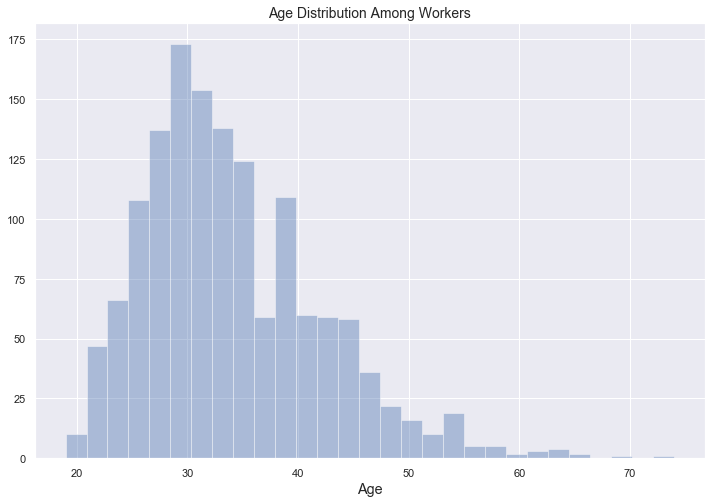

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df['What is your age?'], kde=False)\
              .set_title("Age Distribution Among Workers")\
              .set_size(14)
plt.xlabel('Age', fontsize='large')
plt.xticks() 
plt.show(fig)

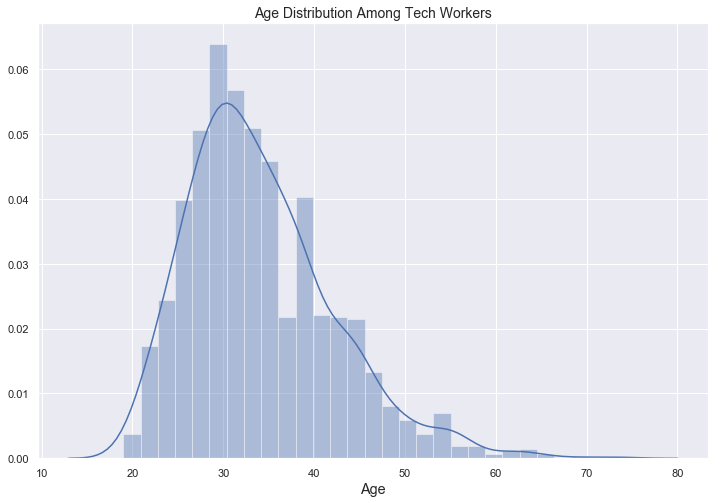

In [13]:
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df['What is your age?'])\
              .set_title("Age Distribution Among Tech Workers")\
              .set_size(14)
plt.xlabel('Age', fontsize='large')
plt.xticks() 
plt.show(fig)

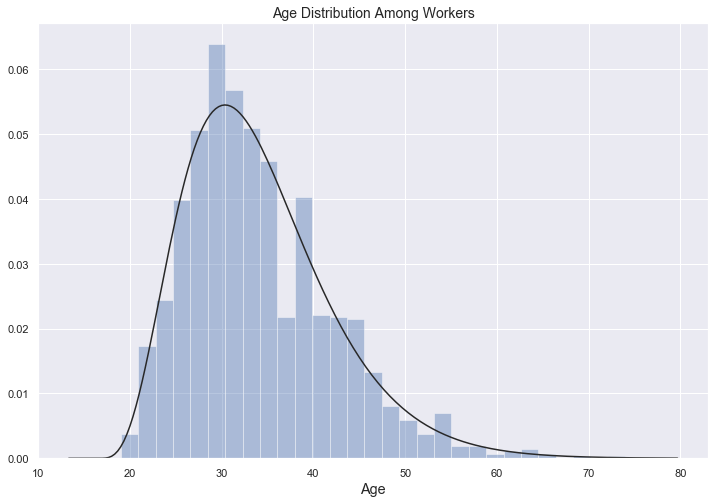

In [12]:
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df['What is your age?'], kde=False,fit=stats.gamma)\
              .set_title("Age Distribution Among Workers")\
              .set_size(14)
plt.xlabel('Age', fontsize='large')
plt.xticks() 
plt.show(fig)

## Barplot

In [9]:
df_percentages = pd.DataFrame(df[df['disorders'] != 'Other'].groupby('disorders').count()['What is your age?'])
df_percentages.columns = ['count_num']

In [10]:
df_percentages['percentage'] = df_percentages.count_num.apply(lambda x: (x/1400)*100)
df_percentages = df_percentages.reset_index()

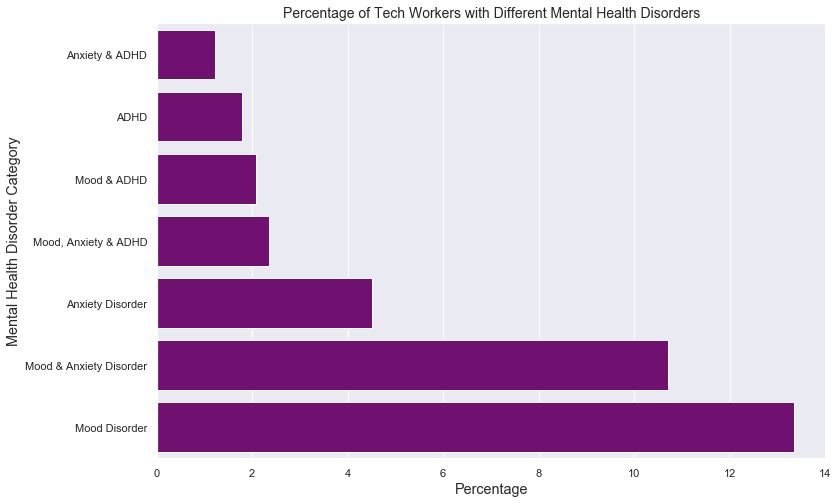

In [337]:
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(y ='disorders',x='percentage',data=df_percentages.sort_values('percentage'), color='purple')\
              .set_title("Percentage of Tech Workers with Different Mental Health Disorders")\
              .set_size(14)
plt.ylabel('Mental Health Disorder Category', fontsize='large')
 
plt.xlabel('Percentage', fontsize='large')
plt.show(fig)

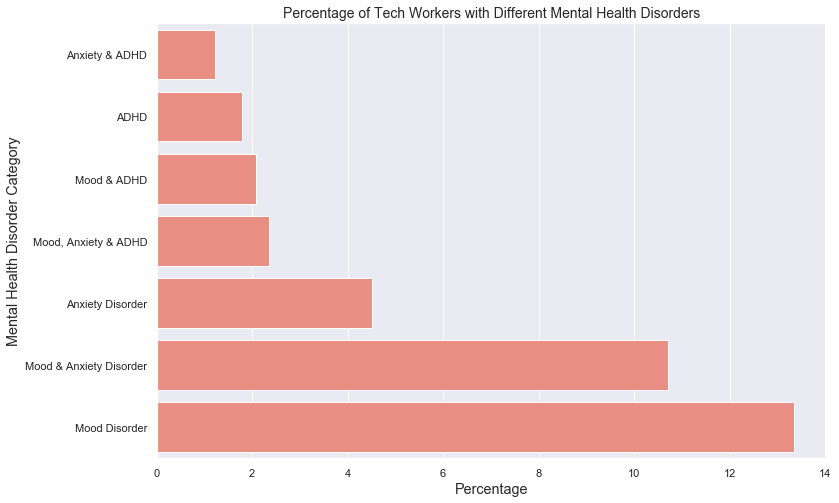

In [11]:
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(y ='disorders',x='percentage',data=df_percentages.sort_values('percentage'), color='salmon')\
              .set_title("Percentage of Tech Workers with Different Mental Health Disorders")\
              .set_size(14)
plt.ylabel('Mental Health Disorder Category', fontsize='large')
 
plt.xlabel('Percentage', fontsize='large')
plt.show(fig)


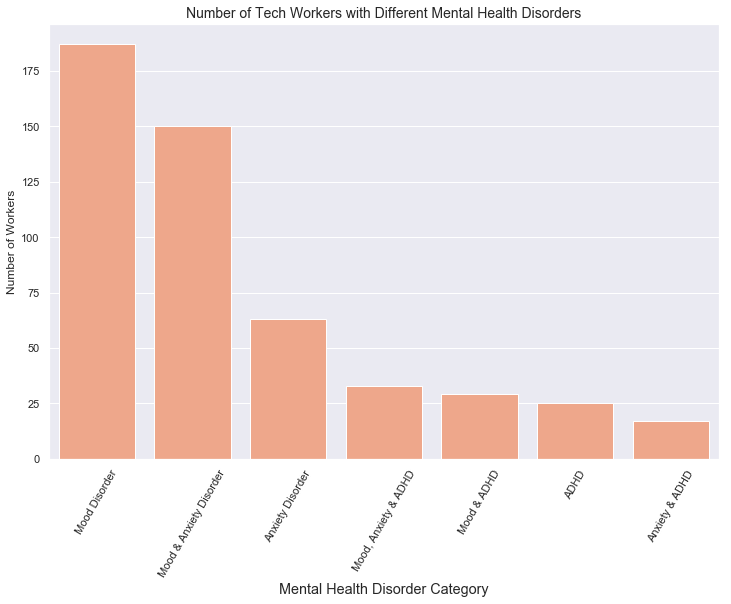

In [14]:
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot('disorders',
              data=df[df['disorders'] != 'Other'],
              order = df.disorders[df['disorders'] != 'Other'].value_counts().index,
              color='lightsalmon')\
              .set_title("Number of Tech Workers with Different Mental Health Disorders")\
              .set_size(14)
plt.xlabel('Mental Health Disorder Category', fontsize='large')
plt.xticks(rotation=60) 
plt.ylabel('Number of Workers')
plt.show(fig)

## Box Plot

In [15]:
prev = pd.read_csv('prevalence_mental_disorder.csv')

In [40]:
usa_prev = prev[prev['Entity'] == 'United States']

In [41]:
usa_prev

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6076,United States,USA,1990,0.340897,0.653706,0.468676,6.576884,2.367794,4.677591,2.173751
6077,United States,USA,1991,0.338913,0.653953,0.473575,6.553351,2.345466,4.660871,2.139292
6078,United States,USA,1992,0.337343,0.654205,0.478610,6.536143,2.339515,4.651949,2.107931
6079,United States,USA,1993,0.336207,0.654431,0.483539,6.525536,2.347095,4.648701,2.080669
6080,United States,USA,1994,0.335536,0.654620,0.488235,6.522278,2.365738,4.649294,2.058632
6081,United States,USA,1995,0.335363,0.654721,0.492368,6.526489,2.392582,4.650869,2.042931
6082,United States,USA,1996,0.335806,0.654749,0.496752,6.578023,2.456048,4.662902,2.033987
6083,United States,USA,1997,0.336797,0.654720,0.501560,6.688847,2.564591,4.689154,2.030590
6084,United States,USA,1998,0.338085,0.654658,0.506483,6.818473,2.688823,4.720716,2.031176
6085,United States,USA,1999,0.339410,0.654564,0.511072,6.926351,2.800595,4.749991,2.034175


In [63]:
usa = usa_prev.drop(columns=['Year','Schizophrenia (%)','Eating disorders (%)','Alcohol use disorders (%)','Entity', 'Code', 'Drug use disorders (%)','Bipolar disorder (%)'])

(4, 8)

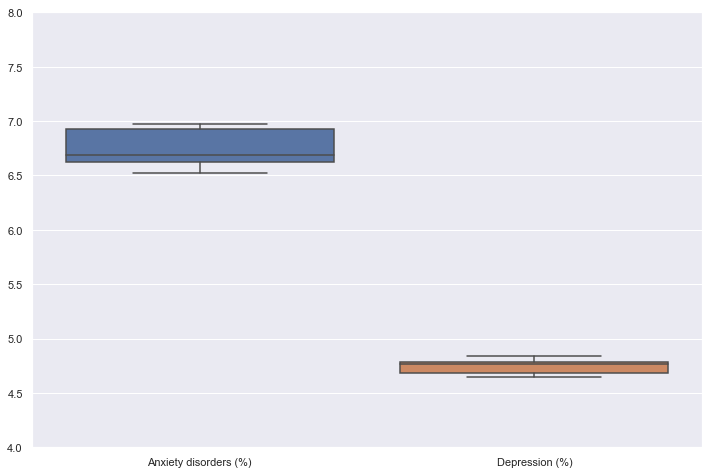

In [65]:
# USA data 
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=usa)
plt.ylim(4, 8)

In [68]:
prev_mean = prev.groupby('Entity', as_index=False).mean()
prev_mean['mood_disorders'] = prev_mean['Bipolar disorder (%)'] + prev_mean ['Depression (%)']

In [74]:
prev_mean = prev_mean.drop(columns=['Year','Schizophrenia (%)','Depression (%)','Eating disorders (%)','Alcohol use disorders (%)', 'Drug use disorders (%)','Bipolar disorder (%)'])
prev_mean

,Entity,Anxiety disorders (%),mood_disorders
0,Afghanistan,4.848102,4.820976
1,Albania,3.368903,2.890534
2,Algeria,5.011396,4.467646
3,American Samoa,3.293312,3.407945
4,Andean Latin America,4.245343,3.502862
5,Andorra,5.279751,4.703774
6,Angola,3.253057,4.802632
7,Antigua and Barbuda,4.622427,3.481498
8,Argentina,6.237986,4.405373
9,Armenia,2.587095,3.391407


In [79]:
prev_mean.columns = ['Entity', 'Anxiety Disorders', 'Mood Disorders']

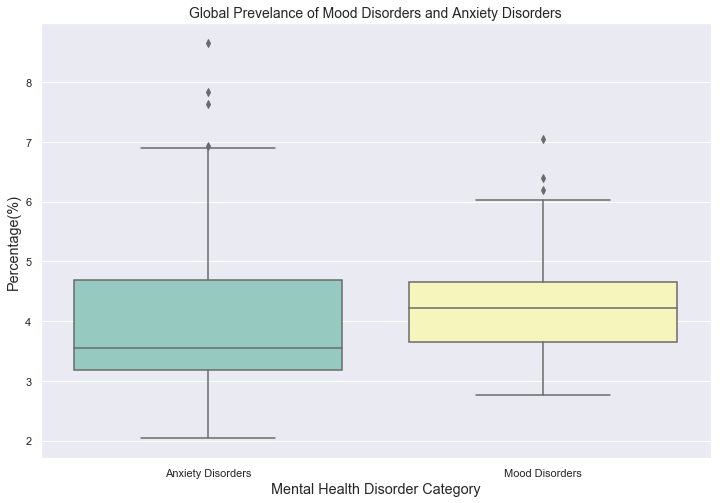

In [85]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=prev_mean, palette="Set3").set_title(
    "Global Prevelance of Mood Disorders and Anxiety Disorders").set_size(14)
plt.xlabel('Mental Health Disorder Category', fontsize='large')
plt.ylabel('Percentage(%)', fontsize='large')
plt.show(fig)

## Scatter Plot

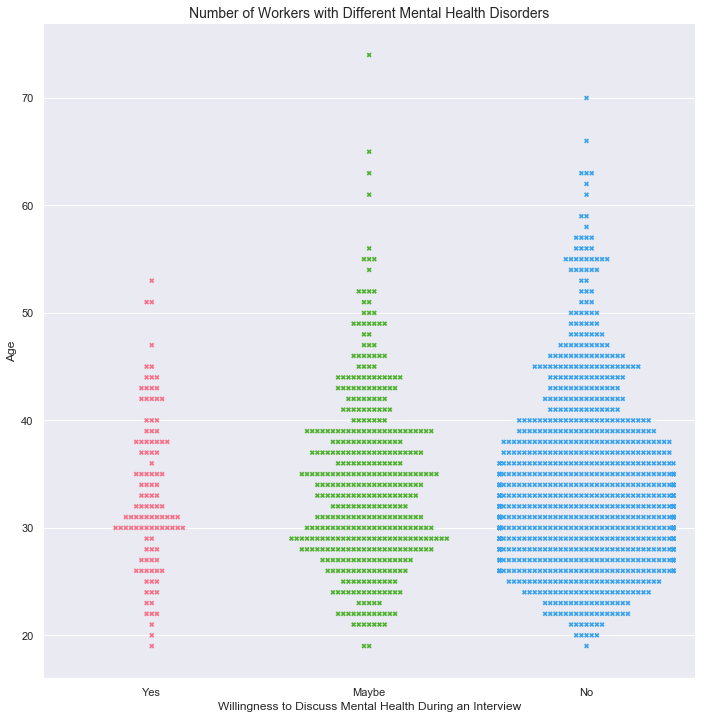

In [169]:
sns.set()
sns.catplot('Would you bring up a mental health issue with a potential employer in an interview?',
            'What is your age?',
            data=df,
            kind='swarm',
            height=10,
            palette="husl",
            marker='X')
plt.title("Number of Workers with Different Mental Health Disorders").set_size(14)
plt.xlabel('Willingness to Discuss Mental Health During an Interview',
           fontsize='medium')
plt.xticks()
plt.ylabel('Age')
plt.show()

## Bubble Plot

In [87]:
gender_prev = pd.read_csv('prevalence_gender.csv')

In [91]:
gender_prev = gender_prev.groupby('Entity', as_index=False).mean().drop(columns=['Year'])

In [92]:
gender_prev.head()

,Entity,Prevalence in males (%),Prevalence in females (%),Total population (Gapminder)
0,Afghanistan,3.544832,4.681302,1.555560e+07
1,Albania,1.635890,2.727524,1.921739e+06
2,Algeria,2.977408,4.328723,1.968594e+07
3,American Samoa,2.464219,3.410989,3.616908e+04
4,Andean Latin America,2.116731,3.114106,NaN


In [95]:
gender_prev['gender_difference'] = abs(gender_prev['Prevalence in males (%)'] - gender_prev['Prevalence in females (%)'])

In [120]:
gender_prev.columns = ['Country', 'Male_Prev', 'Female_Prev', 'Gap_minder', 'gender_difference']

In [133]:
top_30 = gender_prev.sort_values('gender_difference')[:30]
top_10 = gender_prev.sort_values('gender_difference')[:10]

In [134]:
# saving results to csv so I can easily use it Tablaeu
top_30.to_csv('top_30_gender_gap.csv')

In [136]:
bottom_10 = gender_prev.sort_values('gender_difference')[:-10]

In [160]:
top_bottom

,Country,Male_Prev,Female_Prev,Gap_minder,gender_difference
190,Poland,2.044565,2.470568,3.107928e+07,0.426004
192,Puerto Rico,2.545807,2.972877,2.255996e+06,0.427071
52,Colombia,2.044653,2.555457,1.846641e+07,0.510804
162,Namibia,3.128883,3.723530,1.189887e+06,0.594646
177,Northern Mariana Islands,2.771554,3.373296,3.196571e+04,0.601743
209,Seychelles,2.614088,3.242290,5.824786e+04,0.628202
94,Guam,3.139947,3.778359,1.012663e+05,0.638412
161,Myanmar,1.901096,2.561266,2.456112e+07,0.660171
201,Saint Vincent and the Grenadines,2.460859,3.142056,8.752879e+04,0.681197
229,Swaziland,3.530881,4.231952,6.475515e+05,0.701071


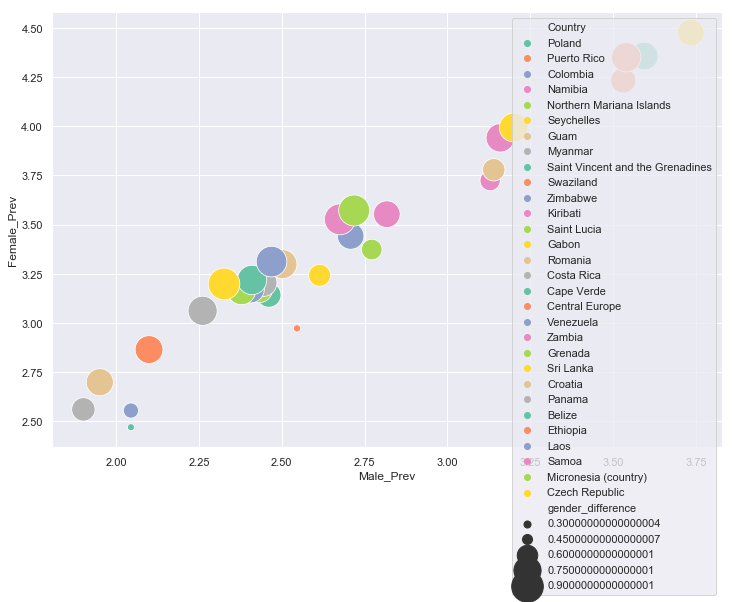

In [132]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 8))
p1 = sns.scatterplot(x='Male_Prev', y='Female_Prev',size='gender_difference', 
                data=top_20, hue='Country', sizes=(50, 1000), hue_norm=(0, 7), palette='Set2')

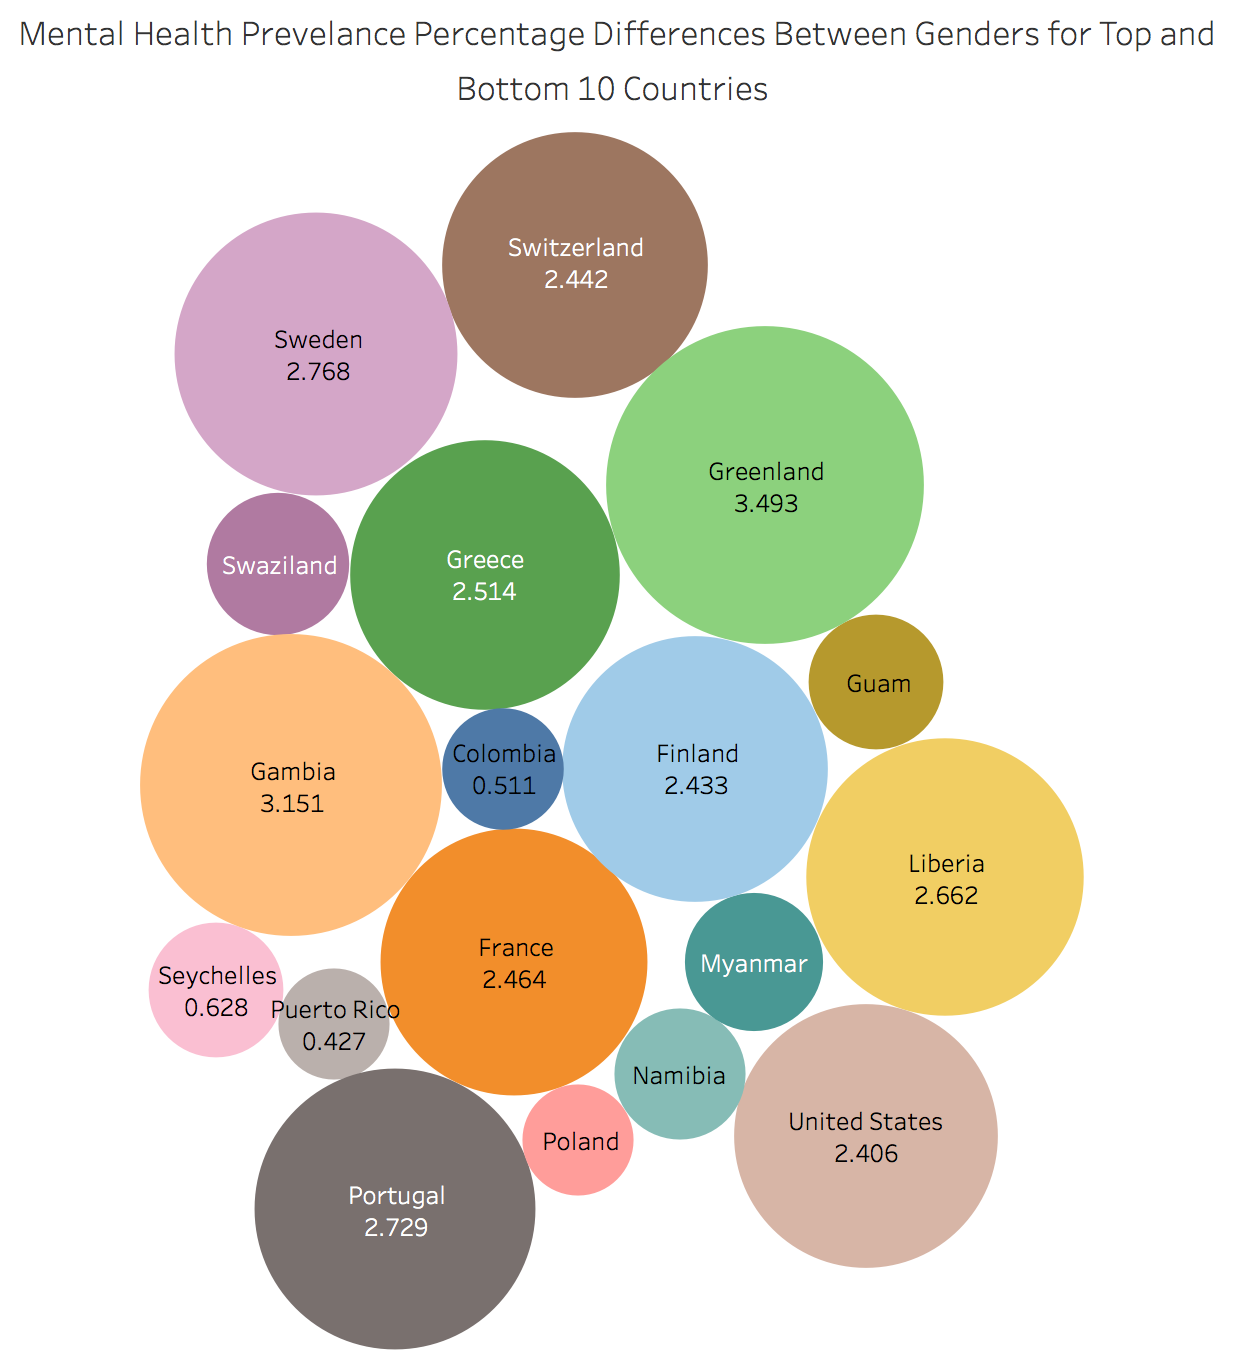

In [163]:
# I used Tableau to generate the bubble plot below because I was not satisfied with the bubble plots I generated in Python
path = "gender_difference.png"
display(Image.open(path))

In [167]:
country = pd.DataFrame(df['What country do you work in?'])

In [168]:
country.columns = ['Country']

In [171]:
country['count'] = 1

In [173]:
country = country.groupby('Country', as_index=False).sum()

In [174]:
country

,Country,count
0,Afghanistan,2
1,Argentina,1
2,Australia,34
3,Austria,4
4,Bangladesh,1
5,Belgium,5
6,Bosnia and Herzegovina,2
7,Brazil,9
8,Brunei,1
9,Bulgaria,7


In [175]:
country.to_csv('country.csv')

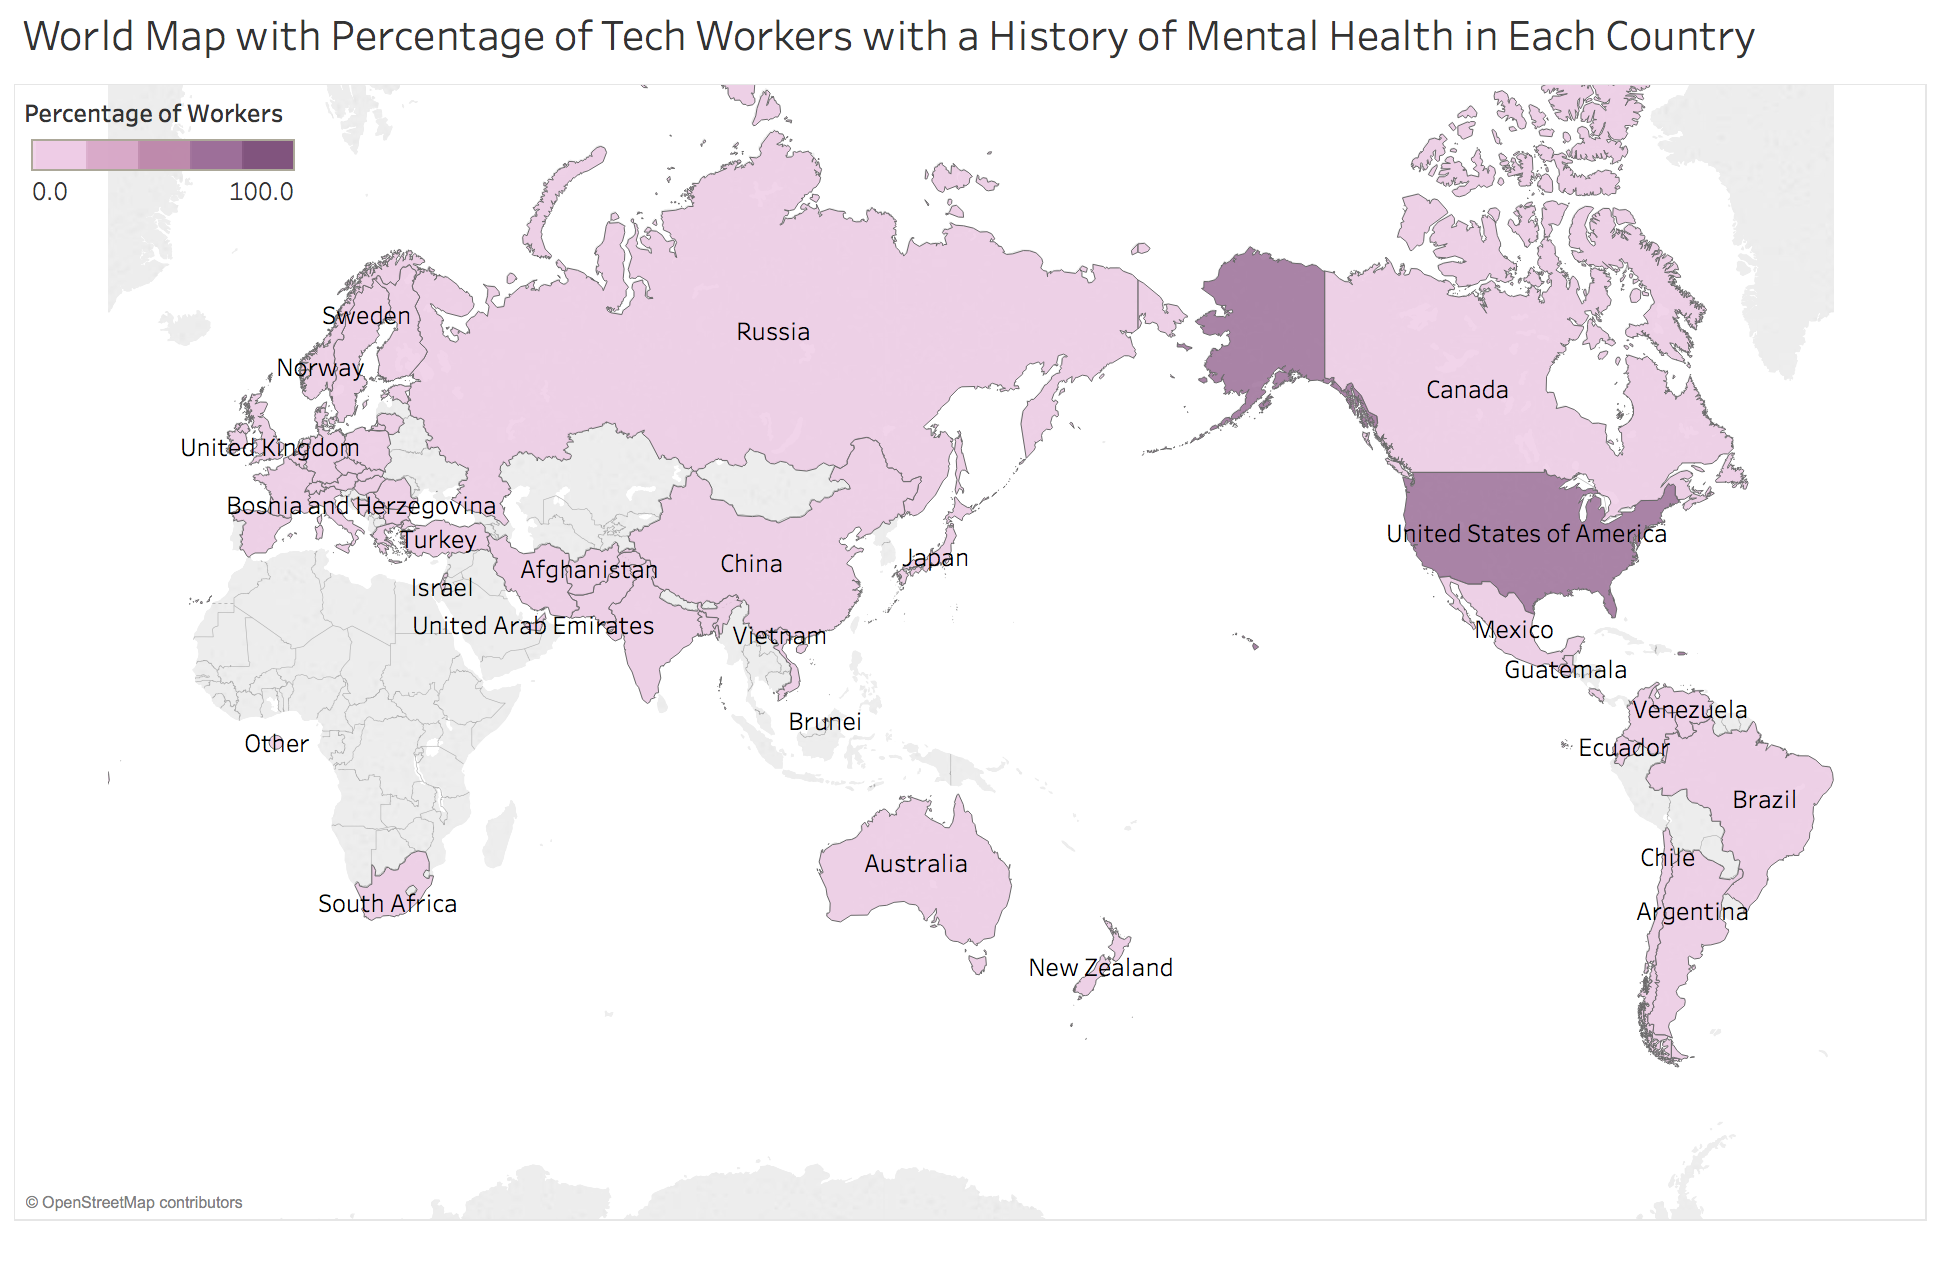

In [176]:
# I used Tableau to generate the world map below 
path2 = 'mental_health_country.png'
display(Image.open(path2))

## Connection Map

In [188]:
anxiety = pd.read_csv('anxiety.csv')

In [189]:
anxiety = anxiety.groupby('Entity', as_index=False).mean()

In [190]:
anxiety = anxiety.drop(columns=['Year'])
anxiety.columns = ['Country', 'Prevalence']

In [191]:
anxiety

,Country,Prevalence
0,Afghanistan,4.848102
1,Albania,3.368903
2,Algeria,5.011396
3,American Samoa,3.293312
4,Andean Latin America,4.245343
5,Andorra,5.279751
6,Angola,3.253057
7,Antigua and Barbuda,4.622427
8,Argentina,6.237986
9,Armenia,2.587095


In [194]:
# filtering countries with high anxiety levels 
anxiety = anxiety[anxiety.Prevalence >= 5]

In [207]:
anxiety = anxiety.sort_values('Prevalence')[-5:]

In [210]:
anxiety

,Country,Prevalence
10,Australasia,6.895850
97,Iran,6.932546
152,Norway,7.637363
150,Northern Ireland,7.826927
143,New Zealand,8.651309


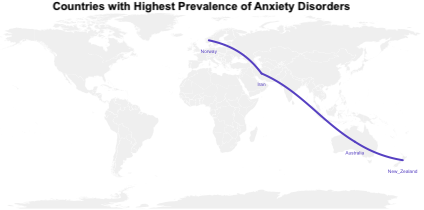

In [292]:
# I used R to generate the world map below 
path2 = 'connection_map.png'
display(Image.open(path2))

## Heat Map

In [246]:
mental = pd.read_csv('prevalence_mental_disorder.csv')
usa = mental[mental.Entity == 'United States']


In [268]:
usa.describe()

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2003.500000,0.338117,0.653710,0.513658,6.741584,2.844713,4.744655,2.046643
std,8.225975,0.002424,0.001028,0.020454,0.165191,0.327117,0.057619,0.040801
min,1990.000000,0.333890,0.651236,0.468676,6.522278,2.339515,4.648701,1.998437
25%,1996.750000,0.336120,0.653187,0.500358,6.620797,2.537456,4.686263,2.022636
50%,2003.500000,0.337639,0.654143,0.520208,6.691116,2.964724,4.766471,2.039057
75%,2010.250000,0.340608,0.654434,0.531246,6.929023,3.002382,4.782974,2.060735
max,2017.000000,0.341535,0.654749,0.534175,6.971995,3.452476,4.835610,2.173751


In [304]:
disorders = ['Schizophrenia','Bipolar disorder','Eating disorders','Anxiety disorders','Drug use disorders','Depression','Alcohol use disorders']
mean_prev = ['0.338117','0.653710','0.513658','6.741584','2.844713','4.744655','2.046643']
list_df = [disorders,mean_prev]
global_mean_prev = pd.DataFrame(list_df, index=None).transpose()
global_mean_prev.columns = ['disorders','prevalence']
global_mean_prev

,disorders,prevalence
0,Schizophrenia,0.338117
1,Bipolar disorder,0.653710
2,Eating disorders,0.513658
3,Anxiety disorders,6.741584
4,Drug use disorders,2.844713
5,Depression,4.744655
6,Alcohol use disorders,2.046643


In [305]:
# Saving results to a csv so I can use it in Tableau
global_mean_prev.to_csv('global_mean_prev.csv')

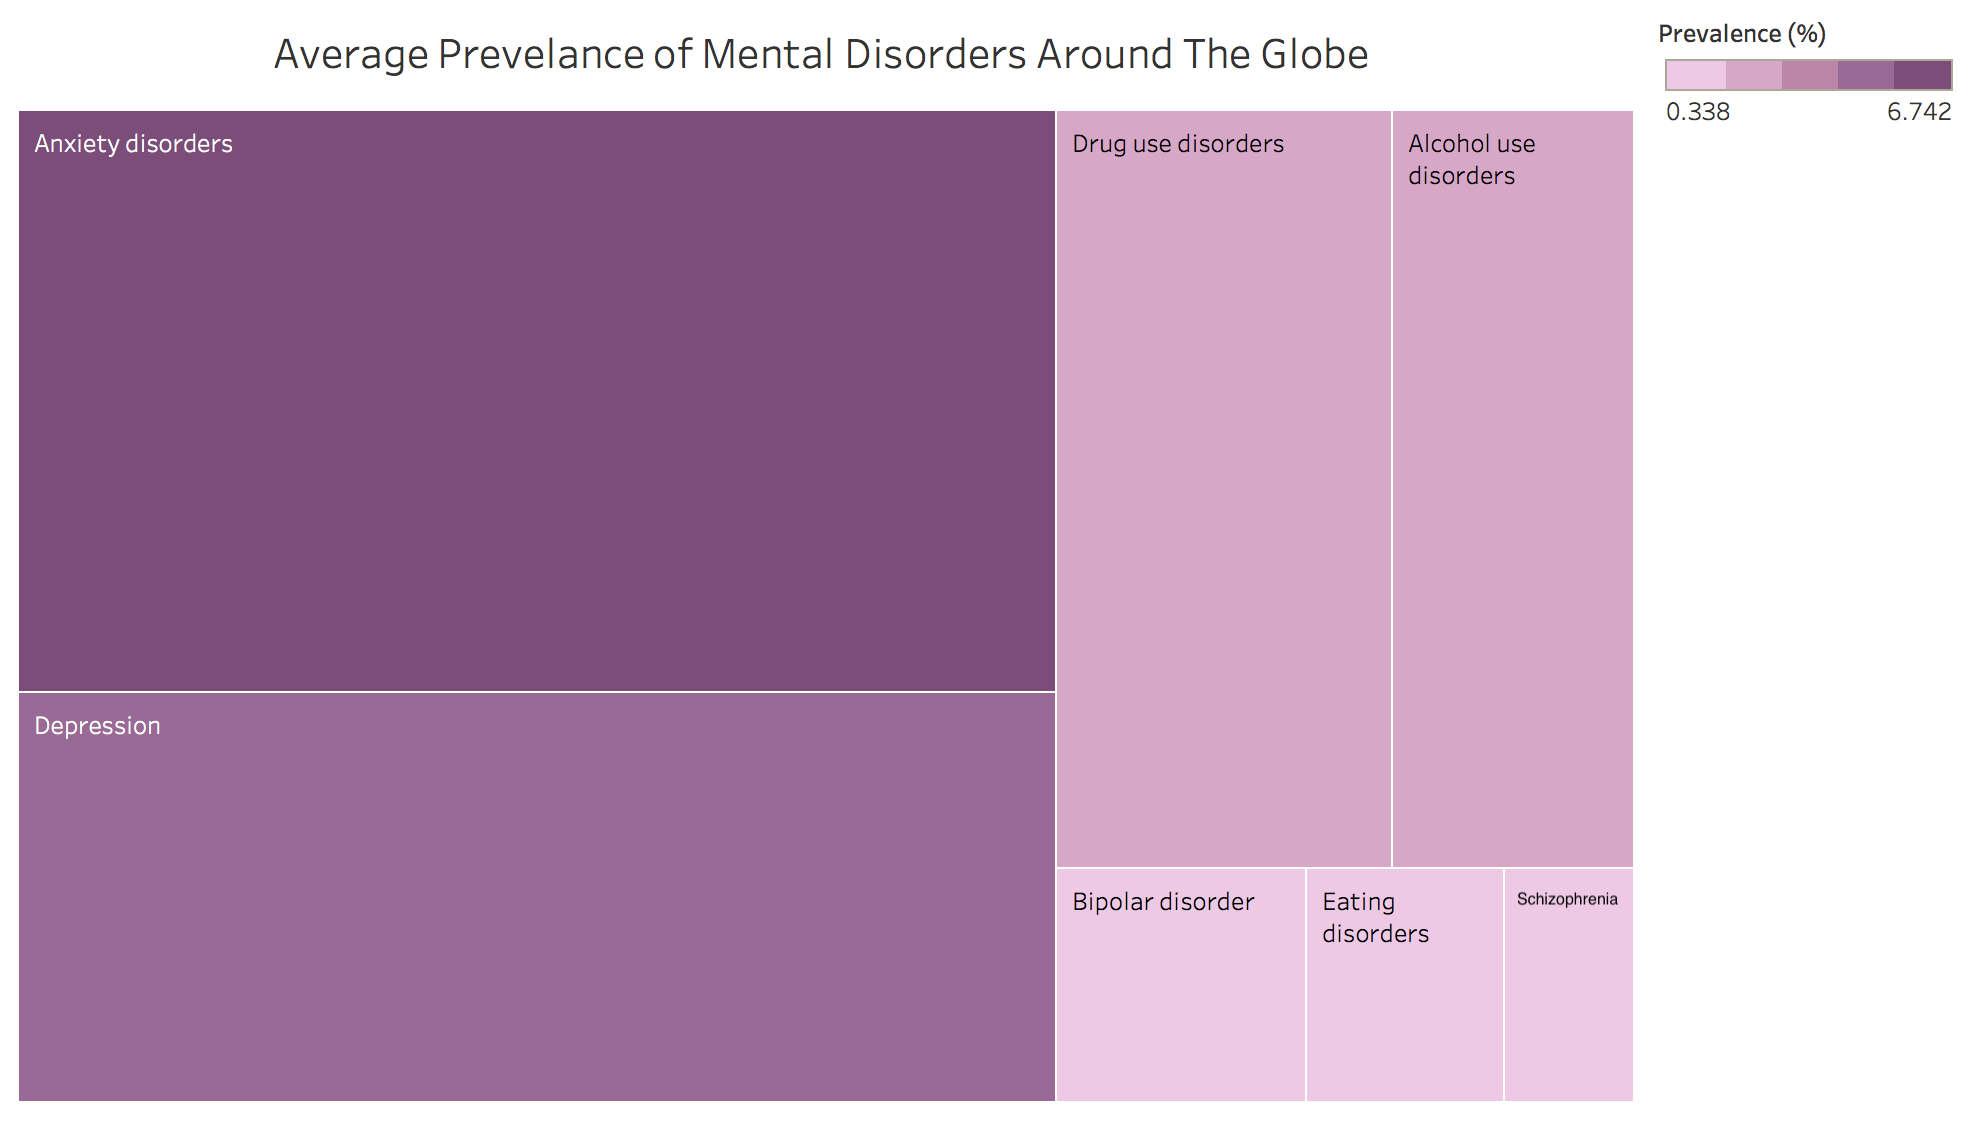

In [307]:
# I used Tableau to generate the world map below 
path2 = 'treemapping.png'
display(Image.open(path2))

## Heat Map

In [250]:
usa.drop(columns=['Code','Entity'])

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6076,1990,0.340897,0.653706,0.468676,6.576884,2.367794,4.677591,2.173751
6077,1991,0.338913,0.653953,0.473575,6.553351,2.345466,4.660871,2.139292
6078,1992,0.337343,0.654205,0.478610,6.536143,2.339515,4.651949,2.107931
6079,1993,0.336207,0.654431,0.483539,6.525536,2.347095,4.648701,2.080669
6080,1994,0.335536,0.654620,0.488235,6.522278,2.365738,4.649294,2.058632
6081,1995,0.335363,0.654721,0.492368,6.526489,2.392582,4.650869,2.042931
6082,1996,0.335806,0.654749,0.496752,6.578023,2.456048,4.662902,2.033987
6083,1997,0.336797,0.654720,0.501560,6.688847,2.564591,4.689154,2.030590
6084,1998,0.338085,0.654658,0.506483,6.818473,2.688823,4.720716,2.031176
6085,1999,0.339410,0.654564,0.511072,6.926351,2.800595,4.749991,2.034175


In [265]:
usa_array = np.array(usa)

In [282]:
mental_top = mental[mental.Entity.isin(['France','Germany', 'United States', 'Canada', 'Australia', 'Netherlands', 'United Kingdom'])]

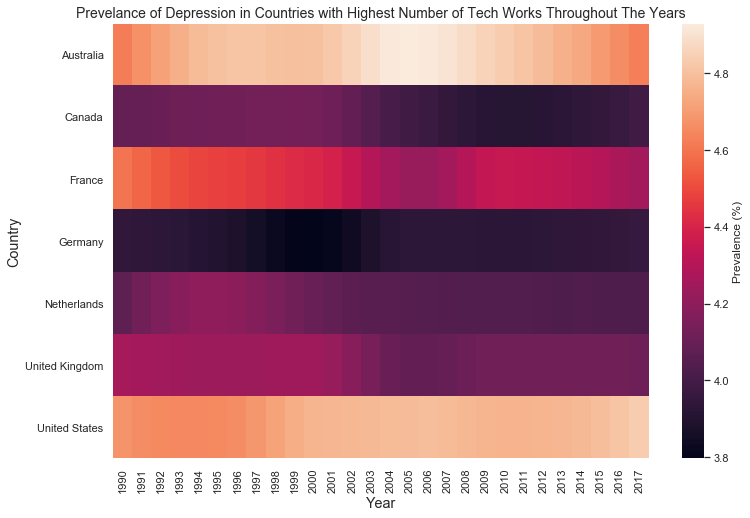

In [291]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(mental_top.pivot("Entity", "Year", "Depression (%)"),cbar_kws={'label': 'Prevalence (%)'})
plt.title("Prevelance of Depression in Countries with Highest Number of Tech Works Throughout The Years").set_size(14)
plt.xlabel('Year',
           fontsize='large')
plt.xticks()
plt.ylabel('Country',fontsize='large')
plt.show()

## Stream Plot

In [308]:
suicide = pd.read_csv('suicide.csv')

In [315]:
suicide_english = suicide[suicide.Entity.isin(['United States', 'Canada', 'United Kingdom', 'Australia'])]
suicide_english = suicide_english[suicide_english.Year >= 1990]

,Entity,Code,Year,"Suicide rate (deaths per 100,000)","Mental and substance use disorder rate (number suffering per 100,000)",Total population (Gapminder)
1100,Australia,AUS,1990,12.800082,16322.572319,17096153.0
1101,Australia,AUS,1991,12.645747,16329.950004,17320633.0
1102,Australia,AUS,1992,12.626962,16334.197459,17529469.0
1103,Australia,AUS,1993,12.265372,16340.244495,17727413.0
1104,Australia,AUS,1994,12.690292,16341.256301,17921818.0
1105,Australia,AUS,1995,12.806768,16335.238736,18118416.0
1106,Australia,AUS,1996,13.088745,16327.131172,18319637.0
1107,Australia,AUS,1997,13.368405,16307.246824,18525153.0
1108,Australia,AUS,1998,13.468468,16284.516768,18734878.0
1109,Australia,AUS,1999,13.029139,16274.735082,18947894.0


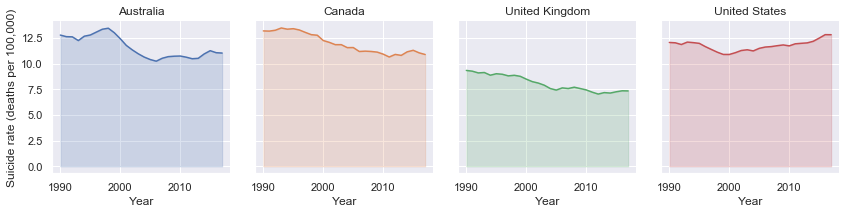

In [333]:
sns.set()
g = sns.FacetGrid(suicide_english, col='Entity', hue='Entity', col_wrap=4)
 
g = g.map(plt.plot, 'Year', 'Suicide rate (deaths per 100,000)')
 
g = g.map(plt.fill_between, 'Year', 'Suicide rate (deaths per 100,000)', alpha=0.2).set_titles("{col_name} Entity")
 
g = g.set_titles("{col_name}")
 

plt.subplots_adjust(top=0.92)
# g = g.fig.subplots("Suicide Rates Over The Years In Major English-Speaking Countries ").set_size(14)